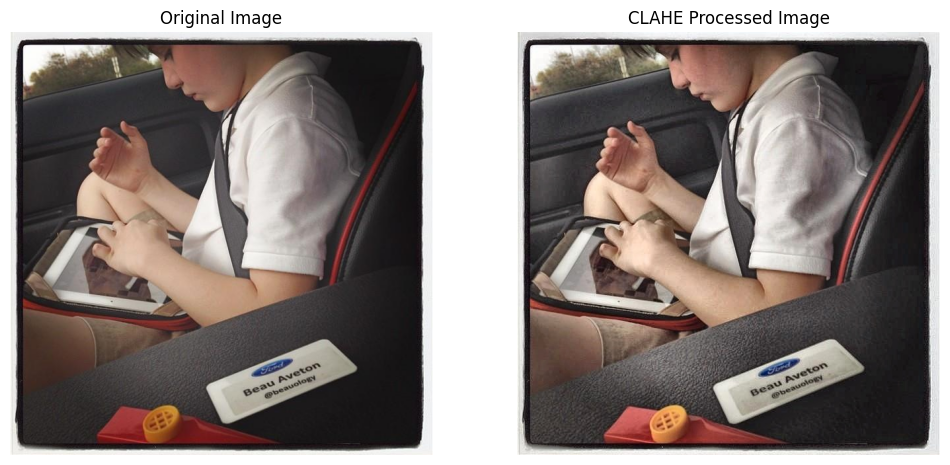

In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Paths to your YOLO dataset
input_folder = '/kaggle/input/dip-dataset/train/images'
output_folder = '/kaggle/working/images_preprocessed'
os.makedirs(output_folder, exist_ok=True)

# Create Contrast Limited Adaptive Histogram Equalization object
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

# Function to apply CLAHE to images
def apply_clahe(image_path, output_path):
    # Read image
    img = cv2.imread(image_path)
    
    # Convert to LAB color space (to only apply CLAHE to L channel)
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    
    # Apply CLAHE to the L (luminance) channel
    l_eq = clahe.apply(l)
    
    # Merge back the channels
    lab_eq = cv2.merge((l_eq, a, b))
    
    # Convert back to BGR
    final_img = cv2.cvtColor(lab_eq, cv2.COLOR_LAB2BGR)
    
    # Save the processed image
    cv2.imwrite(output_path, final_img)

# Loop over all images in the folder
for filename in os.listdir(input_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename)
        apply_clahe(input_path, output_path)



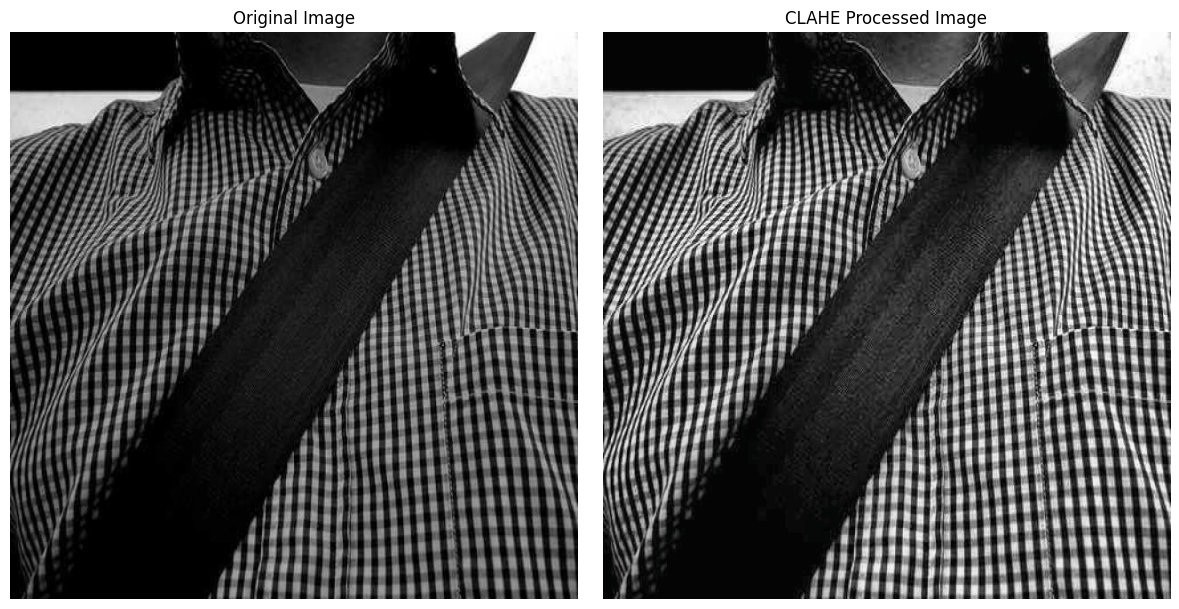

In [5]:
# Show a comparison for the first image (for example)
image_name = '055RXO31SQXG_jpg.rf.634cf3fc14d4c390397eb0b38a0cd8e4.jpg'  # Change this to a valid image in your dataset
original_img = cv2.imread(os.path.join(input_folder, image_name))
clahe_img = cv2.imread(os.path.join(output_folder, image_name))

# Convert BGR to RGB for matplotlib
original_img_rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
clahe_img_rgb = cv2.cvtColor(clahe_img, cv2.COLOR_BGR2RGB)

# Plot comparison
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(original_img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(clahe_img_rgb)
plt.title('CLAHE Processed Image')
plt.axis('off')

# Save the full comparison figure
plt.tight_layout()
plt.savefig('/kaggle/working/clahe_comparison.jpg', dpi=300)

plt.show()




In [ ]:
%pip install ultralytics --upgrade --no-deps

In [2]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov10n.pt')  # or yolov9n.pt, yolov9m.pt

# Train the model
model.train(
    data='/kaggle/input/dip-dataset/data.yaml',
    epochs=50,
    imgsz=640,
    device='0,1'  # GPU device id
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.59M/5.59M [00:00<00:00, 72.8MB/s]


Ultralytics 8.3.131 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
                                                        CUDA:1 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/dip-dataset/data.yaml, degrees=0.0, deterministic=True, device=0,1, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov10n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimize

100%|██████████| 755k/755k [00:00<00:00, 16.5MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1      9856  ultralytics.nn.modules.block.SCDown          [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1     36096  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 69.3MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 9.0±1.2 MB/s, size: 42.0 KB)


train: Scanning /kaggle/input/dip-dataset/train/labels... 1117 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1117/1117 [00:04<00:00, 225.97it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/dip-dataset/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 8.7±1.1 MB/s, size: 41.6 KB)


val: Scanning /kaggle/input/dip-dataset/valid/labels... 312 images, 1 backgrounds, 0 corrupt: 100%|██████████| 312/312 [00:01<00:00, 213.97it/s]/s]
train: Scanning /kaggle/input/dip-dataset/train/labels... 977 images, 1 backgrounds, 0 corrupt:  87%|████████▋ | 977/1117 [00:01<00:00, 543.24it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/dip-dataset/valid is not writeable, cache not saved.


train: Scanning /kaggle/input/dip-dataset/train/labels... 1117 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1117/1117 [00:01<00:00, 582.97it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.49G      3.464      9.457      3.889         17        640: 100%|██████████| 70/70 [00:17<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:04<00:00,  4.78it/s]


                   all        312        364      0.284       0.11      0.112     0.0447

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.72G      3.682      7.947      3.999         15        640: 100%|██████████| 70/70 [00:14<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.89it/s]


                   all        312        364     0.0769     0.0659     0.0123    0.00404

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.72G      3.908      7.147      4.249         18        640: 100%|██████████| 70/70 [00:13<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.33it/s]


                   all        312        364      0.106      0.165      0.061     0.0207

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.72G      3.835      6.354      4.072         14        640: 100%|██████████| 70/70 [00:14<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.52it/s]


                   all        312        364      0.144      0.179     0.0842     0.0262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.72G      3.844      6.013      4.025         15        640: 100%|██████████| 70/70 [00:13<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.87it/s]


                   all        312        364      0.198      0.286       0.13     0.0408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.72G       3.75       5.67      3.939         17        640: 100%|██████████| 70/70 [00:14<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.11it/s]


                   all        312        364      0.168      0.181      0.098     0.0312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.72G      3.614      5.554      3.885         17        640: 100%|██████████| 70/70 [00:13<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.14it/s]


                   all        312        364      0.264      0.217       0.18     0.0707

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.72G      3.576      5.295      3.802         14        640: 100%|██████████| 70/70 [00:14<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.97it/s]


                   all        312        364      0.276      0.288      0.208     0.0714

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.72G      3.583      5.228      3.776         10        640: 100%|██████████| 70/70 [00:13<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.25it/s]


                   all        312        364      0.353      0.332      0.239      0.091

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.72G      3.523      5.239      3.732         16        640: 100%|██████████| 70/70 [00:14<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.04it/s]


                   all        312        364      0.356      0.302      0.241     0.0881

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.72G      3.461      5.032      3.654         14        640: 100%|██████████| 70/70 [00:13<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.40it/s]


                   all        312        364      0.364      0.365      0.296        0.1

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.72G      3.405      4.851      3.585         22        640: 100%|██████████| 70/70 [00:14<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.28it/s]


                   all        312        364      0.438       0.33      0.328      0.141

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.72G      3.414      4.949      3.613         16        640: 100%|██████████| 70/70 [00:13<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.07it/s]


                   all        312        364      0.408       0.42      0.332      0.129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.72G      3.526      4.726      3.642         19        640: 100%|██████████| 70/70 [00:14<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.18it/s]


                   all        312        364       0.43      0.409      0.362      0.145

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.72G      3.402      4.658      3.552         12        640: 100%|██████████| 70/70 [00:13<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.06it/s]


                   all        312        364      0.462      0.415      0.412      0.166

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.72G      3.347       4.69       3.58          9        640: 100%|██████████| 70/70 [00:14<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.28it/s]


                   all        312        364      0.473      0.442      0.402      0.163

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.72G      3.301      4.551      3.503         16        640: 100%|██████████| 70/70 [00:13<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.43it/s]


                   all        312        364      0.416      0.429      0.385      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.72G      3.276      4.513      3.479         10        640: 100%|██████████| 70/70 [00:14<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.23it/s]


                   all        312        364      0.505      0.421       0.44       0.18

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.72G      3.214      4.429       3.42         19        640: 100%|██████████| 70/70 [00:13<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.91it/s]


                   all        312        364      0.529       0.45      0.437      0.174

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.72G      3.333      4.379      3.475         13        640: 100%|██████████| 70/70 [00:14<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.17it/s]


                   all        312        364      0.474      0.489      0.468      0.187

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.72G      3.277      4.325      3.469         13        640: 100%|██████████| 70/70 [00:13<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.84it/s]


                   all        312        364      0.567      0.448      0.474      0.187

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.72G      3.242      4.237       3.46         23        640: 100%|██████████| 70/70 [00:13<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.21it/s]


                   all        312        364      0.471      0.481      0.445      0.184

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.72G      3.208      4.201       3.41         13        640: 100%|██████████| 70/70 [00:13<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.01it/s]


                   all        312        364      0.513      0.495      0.452      0.191

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.72G      3.214      4.248      3.423         18        640: 100%|██████████| 70/70 [00:13<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.15it/s]


                   all        312        364      0.551      0.492      0.456       0.19

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.72G      3.217      4.106      3.398         13        640: 100%|██████████| 70/70 [00:13<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.78it/s]


                   all        312        364      0.474      0.464      0.437      0.183

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.72G      3.161      4.094      3.351         13        640: 100%|██████████| 70/70 [00:13<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.25it/s]


                   all        312        364       0.58      0.519      0.508      0.201

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.72G      3.204      4.124      3.459         19        640: 100%|██████████| 70/70 [00:14<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.24it/s]


                   all        312        364      0.552      0.503      0.485      0.206

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.72G      3.176      4.172      3.375         18        640: 100%|██████████| 70/70 [00:13<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.05it/s]


                   all        312        364      0.528       0.53      0.485       0.19

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.72G      3.146      4.086      3.359         12        640: 100%|██████████| 70/70 [00:14<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.13it/s]


                   all        312        364      0.551      0.495      0.501       0.21

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.72G       3.08      4.012      3.284         18        640: 100%|██████████| 70/70 [00:13<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.32it/s]


                   all        312        364      0.575      0.538      0.518      0.219

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.72G      3.005      3.948       3.28         19        640: 100%|██████████| 70/70 [00:14<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.92it/s]


                   all        312        364      0.585      0.543      0.531      0.225

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.72G      3.146      4.003      3.351         16        640: 100%|██████████| 70/70 [00:13<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.22it/s]


                   all        312        364      0.539      0.524      0.503      0.222

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.72G       3.01      3.734      3.272         22        640: 100%|██████████| 70/70 [00:14<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.11it/s]


                   all        312        364      0.581      0.525      0.515      0.233

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.72G      3.069      3.779       3.29         18        640: 100%|██████████| 70/70 [00:13<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.79it/s]


                   all        312        364      0.575      0.571      0.552      0.238

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.72G      3.033       3.73      3.235         11        640: 100%|██████████| 70/70 [00:14<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.08it/s]


                   all        312        364      0.602       0.56      0.552      0.248

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.72G      3.039      3.741      3.297         15        640: 100%|██████████| 70/70 [00:14<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.07it/s]


                   all        312        364      0.658      0.525      0.573      0.249

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.72G      3.028      3.654      3.254         23        640: 100%|██████████| 70/70 [00:14<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.84it/s]


                   all        312        364      0.624      0.543      0.589      0.266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.72G      2.954      3.684       3.22         18        640: 100%|██████████| 70/70 [00:13<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.24it/s]


                   all        312        364      0.637      0.536      0.582       0.26

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.72G      2.928      3.614      3.209         12        640: 100%|██████████| 70/70 [00:14<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.02it/s]


                   all        312        364      0.596      0.599      0.571      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      1.72G      2.966      3.625      3.221         10        640: 100%|██████████| 70/70 [00:13<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.08it/s]


                   all        312        364      0.615      0.577      0.577      0.261
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      1.72G      3.092      3.282      3.471         11        640: 100%|██████████| 70/70 [00:14<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.24it/s]


                   all        312        364      0.598      0.585      0.563       0.25

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.72G      3.012      3.074      3.436         11        640: 100%|██████████| 70/70 [00:13<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.44it/s]


                   all        312        364      0.624      0.592      0.595      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.72G      2.944      2.946      3.431          7        640: 100%|██████████| 70/70 [00:13<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.98it/s]


                   all        312        364      0.625      0.613      0.594      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.72G      2.965      2.861      3.389          8        640: 100%|██████████| 70/70 [00:13<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.39it/s]


                   all        312        364      0.657      0.547      0.582      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.72G      2.904      2.775      3.366          9        640: 100%|██████████| 70/70 [00:14<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.16it/s]


                   all        312        364      0.632      0.621      0.591      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.72G      2.892      2.751      3.385          8        640: 100%|██████████| 70/70 [00:13<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.27it/s]


                   all        312        364      0.622      0.621      0.598      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.72G      2.832      2.749       3.31          8        640: 100%|██████████| 70/70 [00:14<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.30it/s]


                   all        312        364      0.629      0.591      0.589      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.72G      2.886      2.675      3.338          7        640: 100%|██████████| 70/70 [00:13<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.28it/s]


                   all        312        364      0.648      0.586      0.574      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      1.72G      2.817      2.641      3.269          7        640: 100%|██████████| 70/70 [00:13<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.17it/s]


                   all        312        364      0.655      0.609       0.59      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      1.72G      2.879      2.722       3.34          7        640: 100%|██████████| 70/70 [00:13<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.10it/s]


                   all        312        364      0.674       0.59      0.599      0.275

50 epochs completed in 0.232 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.8MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.8MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.131 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
                                                        CUDA:1 (Tesla T4, 15095MiB)
YOLOv10n summary (fused): 102 layers, 2,265,363 parameters, 0 gradients


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.53it/s]


                   all        312        364      0.674      0.592      0.599      0.275


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.3ms preprocess, 4.7ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/train


In [3]:
import zipfile
import os

def zip_folder(folder_path, output_path):
    with zipfile.ZipFile(output_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, start=folder_path)
                zipf.write(file_path, arcname)

# Usage
zip_folder('/kaggle/working/runs', 'train5.zip')


from IPython.display import FileLink
FileLink('train5.zip')


/kaggle/working/train5.zip